## Exercise 08 : Seaborn

 analyze only the users and not the admins
* take into account only logs from the table checker where the status is ready
* you can choose the palette that you enjoy
* the linewidth should be 3
* the background of the graph is gray
* the height should be 10, and the width should 1.5x in relation to the height
* the fontsize of the title should be 30
* the fontsize of the axises labels is 15

In [ ]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns 

con= sqlite3.connect("data/checking-logs.sqlite")
main_query="""
SELECT
    uid,
    DATE(timestamp) AS date,
    numTrials
FROM checker c
WHERE uid LIKE "user_%" AND status=='ready' AND labname=='project1'
ORDER BY uid,date
"""
df=pd.read_sql(main_query, con, parse_dates=['date'])
df


,uid,date,numTrials
0,user_1,2020-05-14,1
1,user_1,2020-05-14,2
2,user_1,2020-05-14,3
3,user_1,2020-05-14,4
4,user_1,2020-05-14,5
...,...,...,...
946,user_8,2020-05-14,4
947,user_8,2020-05-14,5
948,user_8,2020-05-14,6
949,user_8,2020-05-14,7


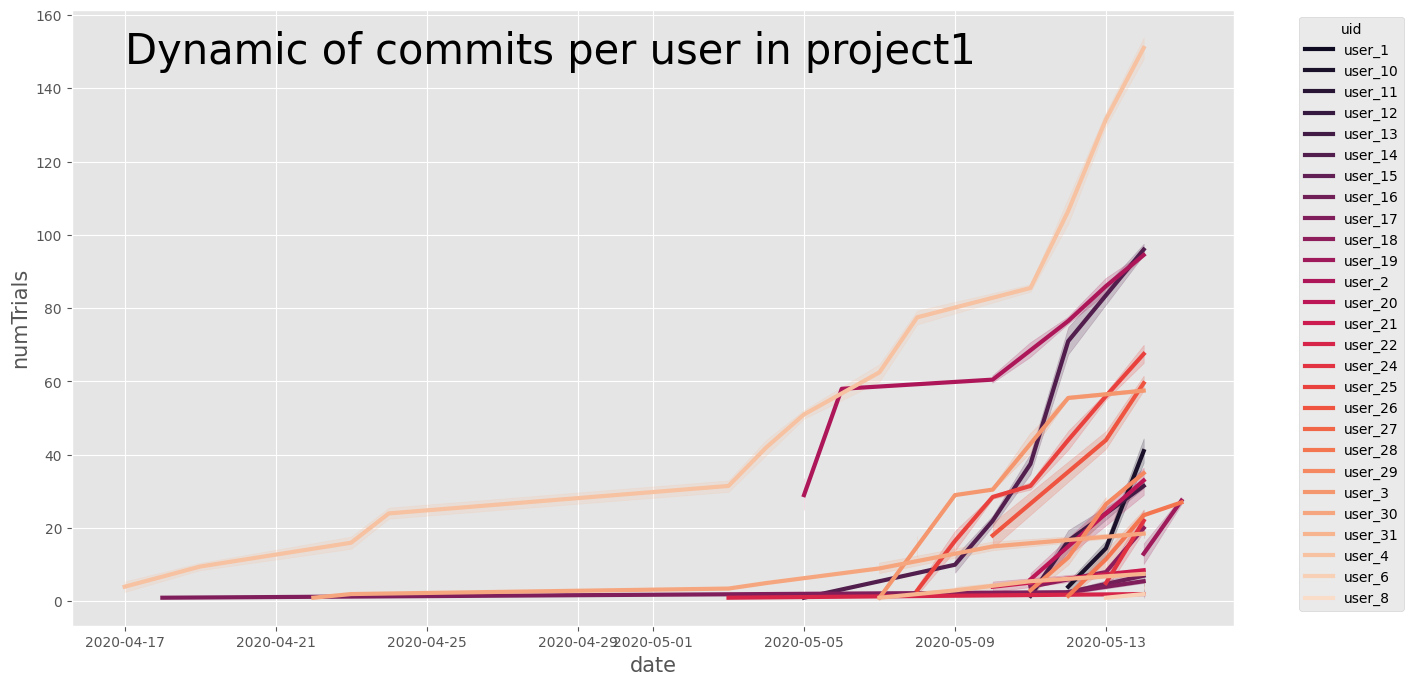

In [22]:
plt.style.use('ggplot')
fig, ax1=plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df,
    x='date',
    y='numTrials',
    hue='uid',
    palette='rocket',
    linewidth=3,
    ax=ax1
)


ax1.text(
    x=df['date'].min(),
    y=df['numTrials'].max() * 0.95,
    s="Dynamic of commits per user in project1", 
    fontsize=30,
    va='top'
)
ax1.set_xlabel("date", fontsize=15)
ax1.set_ylabel("numTrials", fontsize=15)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left').set_title('uid')

In [21]:
con.close()

* “Which user was the leader in the number of commits almost all of the time?”

The answer: user_4

* “Which user was the leader for only a short period of time?” 

The answer: user_2